In [1]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd

from parameteriser import runner

/home/eva/anaconda3/envs/qm_resp_3.8/lib/python3.8/site-packages/psiresp/charge.py:282: FutureWarning: `symmetric_atoms_are_equivalent` will be set to False by default for now, as it is a new feature. It will be set to True by default in the future
  warnings.warn(


Staple SMILES string

In [2]:
parm = runner.FF_Generator("O=C([C@H](CSCC1=CC=CC(CSC[C@@H](C(NC)=O)NC(C)=O)=C1)NC(C)=O)NC")
# parm= runner.FF_Generator("O=C(N[C@@H](C)C(NC)=O)C")

Treating your residue as a stapled residue


Displaying the molecule with the backbone atoms highlighted

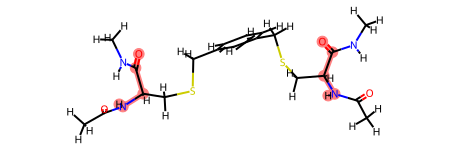

In [3]:
parm.mol

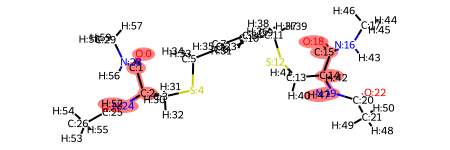

In [4]:
for i, atom in enumerate(parm.mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))

parm.mol

The backbone, capping group and side chain atoms can be accessed with:

In [5]:
parm.backbone_list

[0, 1, 2, 14, 15, 47, 18, 19, 52, 24]

In [6]:
parm.sidechain_list

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 23,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 51]

In [7]:
parm.capping_list

[16,
 17,
 20,
 21,
 22,
 25,
 26,
 27,
 28,
 29,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

Run RESP charge calculations

In [8]:
parm.get_resp_job()
parm.psiresp_job # access the parameters of the RESP calculation

Job(molecules=[Molecule(name=C20H30N4O4S2, charge=0) with 50 conformers], qm_optimization_options=QMGeometryOptimizationOptions(method='hf', basis='6-31g*', pcm_options=None, driver='gradient', query_interval=20, protocols={'wavefunction': 'orbitals_and_eigenvalues'}, keywords={}, g_convergence='gau_tight', max_iter=200, full_hess_every=10, jobname='optimization'), qm_esp_options=QMEnergyOptions(method='hf', basis='6-31g*', pcm_options=None, driver='energy', query_interval=20, protocols={'wavefunction': 'orbitals_and_eigenvalues'}, keywords={}, jobname='single_point'), grid_options=GridOptions(grid_rmin=0, grid_rmax=-1, use_radii='msk', vdw_radii={}, vdw_scale_factors=[1.4, 1.6, 1.8, 2.0], vdw_point_density=1.0), resp_options=RespOptions(restraint_slope=0.1, restrained_fit=True, exclude_hydrogens=True, convergence_tolerance=1e-06, max_iter=500, restraint_height_stage_1=0.0005, restraint_height_stage_2=0.001, stage_2=True), charge_constraints=ChargeConstraintOptions(charge_sum_constrain

In [ ]:
try:
    parm.run_resp_job(parm.psiresp_job)
except:
    pass

In [ ]:
try:
    parm.run_resp_optimisation(parm.psiresp_job)
except:
    pass

In [ ]:
try:
    parm.run_qm_get_charges(parm.psiresp_job)
except:
    pass

In [ ]:
parm.charges

In [ ]:
charges_array = np.array(parm.charges)
charges_array

In [ ]:
charges_dataframe = pd.DataFrame(charges_array)
charges_dataframe.to_csv('residue_resp_charges.csv')